## Multivariate Regression and Regularization 

* We are going to focus on multivariate Linear Regression as a problem space to discuss the concept **regularization** in order to improve the predictive ability of models.
* In the video lectures, this is optimizing the Bias-variance trade off in order to stay in the "Goldilocks" zone.   
* The concepts discussed here extend simply to the Logistic Regression case, with the Least-Squares Error replaced with the negative log-Likelihood.  

### Linear Regression Model 

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i,\qquad i=1,\dots,n $$

$$ error(\beta_1,\beta_0 |(x_i,y_i)) =\sum_{i=1}^n \big(y_i-\beta_0-\beta_1x_i\big)^2.$$

This is a standard formulation of the sum of squared errors and we will use it to establish the general solution. 

If we take derivates with respect to $\beta_0$ and $\beta_1$ we get two equations in two unknowns, which we can solve. 

\begin{equation}
\hat\beta_1=\frac{\sum (x_i-\bar x)(y_i-\bar y)}{\sum (x_i-\bar x)^2},
\end{equation}
where $\bar x, \bar y$ are the sample means. 

\begin{equation}
\hat\beta_0=\bar y-\hat\beta_1\bar x.
\end{equation}


I find this representation more intuition building 


$$\hat{\beta}_1
= \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}, 
\qquad
\hat{\beta}_0
= \bar{y} - \hat{\beta}_1 \,\bar{x} $$

where
$$ \mathrm{Cov}(x,y) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}),
\quad
\mathrm{Var}(x) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2
$$ 


### Matrix Representation of the Multivariate Regression Model 

* In the case of multivariate regression model, we can represent it in matrix form.

* I am going to assume the data is *centered*, to make my life easier.  That means, the mean has been removed from every variable. 

* In any case, in order to handle variables with different units, its always good practice to use `StandardScaler` to z-transform variables. 

* In this case the data is *centered and scaled*. 


$$ \boldsymbol{Y} = \boldsymbol{X \beta} + \boldsymbol{\epsilon}$$

* The data is assume to be centered 
* The data is assumed to be n observations. 
* There are M variables to use as predictors 
* $\boldsymbol{X}$ is an n $\times$ (M+1) matrix of *predictors*
* $\boldsymbol{\beta}$ is an M+1-dimensional vector *regression coefficients* 
* $\boldsymbol{Y}$ is an n-dimensional vector *response* 
    * in Logistic Regression, we called this the *target*
* $\boldsymbol{\epsilon}$ is an n-dimensional vector *error*


$$
\boldsymbol{Y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}, \quad \boldsymbol{X} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \dots & x_{1,M} \\
x_{2,1} & x_{2,2} & \dots & x_{2,M} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1} & x_{n,2} & \dots & x_{n,M} \\
\end{bmatrix}, \quad \beta = \begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_M
\end{bmatrix}, \quad \boldsymbol{\epsilon} = \begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{bmatrix}
$$



### Least-Squares Solution

* The process of generating the solution is exactly the same, whether there is one predictor or M predictors.  

* Take the derivative with respect to each $\beta_k, k = 1 \dots M$. 

* Simultaneously solve the M equations.  


$$ MSE(\boldsymbol{\beta}) = \frac{1}{n} \Vert \boldsymbol{Y} - \boldsymbol{X \beta} \Vert  $$

$$ \hat{\boldsymbol{\beta}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{Y} $$

* Equivalently, this could be written as 

$$\hat{\beta}_1
= \frac{\mathrm{Cov}(\boldsymbol{X,Y})}{\mathrm{Cov}(\boldsymbol{X})}, 
\qquad



In [1]:
# Data and Stats packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

### EDA: House Price Data From Kaggle

* House price dataset is taken from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). 

* The task is to build a regression model to **predict the price**, based on different attributes.

* To make this run quicker, we're going to draw a random subset of 4000 random samples and 9 predictors.  

* If you need to reduce the subset on your computer, go ahead and drop it to 1000. 

In [2]:
# Load the dataset 
full_df = pd.read_csv('../data/kc_house_data.csv')
#this line grabs a random subset of 4000
nsamples = 4000
house_df = full_df.sample(frac=1, random_state=42)[0:nsamples]
#I am choosing these 9 predictors and the price of the house 
cols_of_interest = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
                    'lat', 'long', 'price']
house_df = house_df[cols_of_interest]
#lets convert price to $1000's, "K"
house_df['price'] = house_df['price']/1000

house_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,price
735,4,2.25,2070,8893,2.0,2070,47.4388,-122.162,365.0
2830,5,3.00,2900,6730,1.0,1830,47.6784,-122.285,865.0
4106,4,2.50,3770,10893,2.0,3770,47.5646,-122.129,1038.0
16218,3,3.50,4560,14608,2.0,4560,47.6995,-122.228,1490.0
19964,3,2.50,2550,5376,2.0,2550,47.6647,-122.083,711.0


* Now let's check for null values and look at the datatypes within the dataset.

In [3]:
print(house_df.shape)
print(house_df.dtypes)

(4000, 9)
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
sqft_above       int64
lat            float64
long           float64
price          float64
dtype: object


In [4]:
print(house_df.isna().sum())

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
sqft_above     0
lat            0
long           0
price          0
dtype: int64


No missing data!

In [5]:
house_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,price
count,4000.000000,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,3.379250,2.116563,2096.645250,1.616511e+04,1.475000,1792.465000,47.560091,-122.214060,549.75221
std,0.922568,0.783175,957.785141,5.120888e+04,0.530279,849.986192,0.139070,0.141879,389.05053
min,0.000000,0.000000,384.000000,5.720000e+02,1.000000,384.000000,47.155900,-122.515000,82.50000
25%,3.000000,1.750000,1420.000000,5.200000e+03,1.000000,1180.000000,47.468175,-122.328000,324.95000
50%,3.000000,2.250000,1920.000000,7.675000e+03,1.000000,1550.000000,47.573800,-122.231000,455.00000
75%,4.000000,2.500000,2570.000000,1.087125e+04,2.000000,2250.000000,47.679100,-122.127000,654.12500
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,47.777500,-121.315000,5570.00000


* Let's see how the response variable (`price`) is distributed

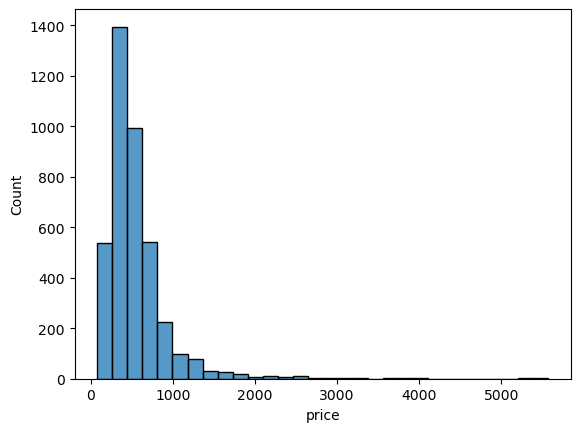

In [6]:
sns.histplot(house_df,x='price',bins = 30)
plt.show()

I somewhat dislike this.  Consider this alternative, which may produce a better model. 

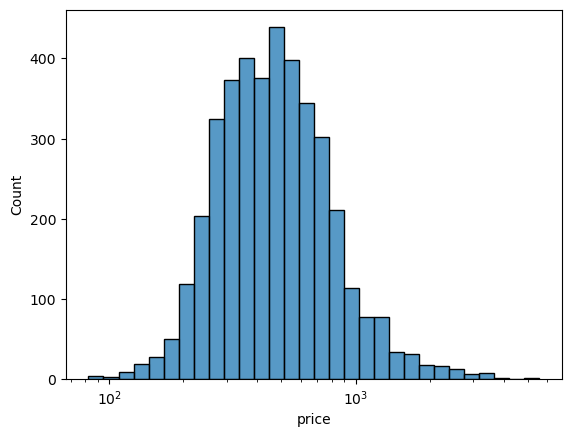

In [7]:
sns.histplot(house_df,x='price',bins = 30, log_scale = True)
plt.show()

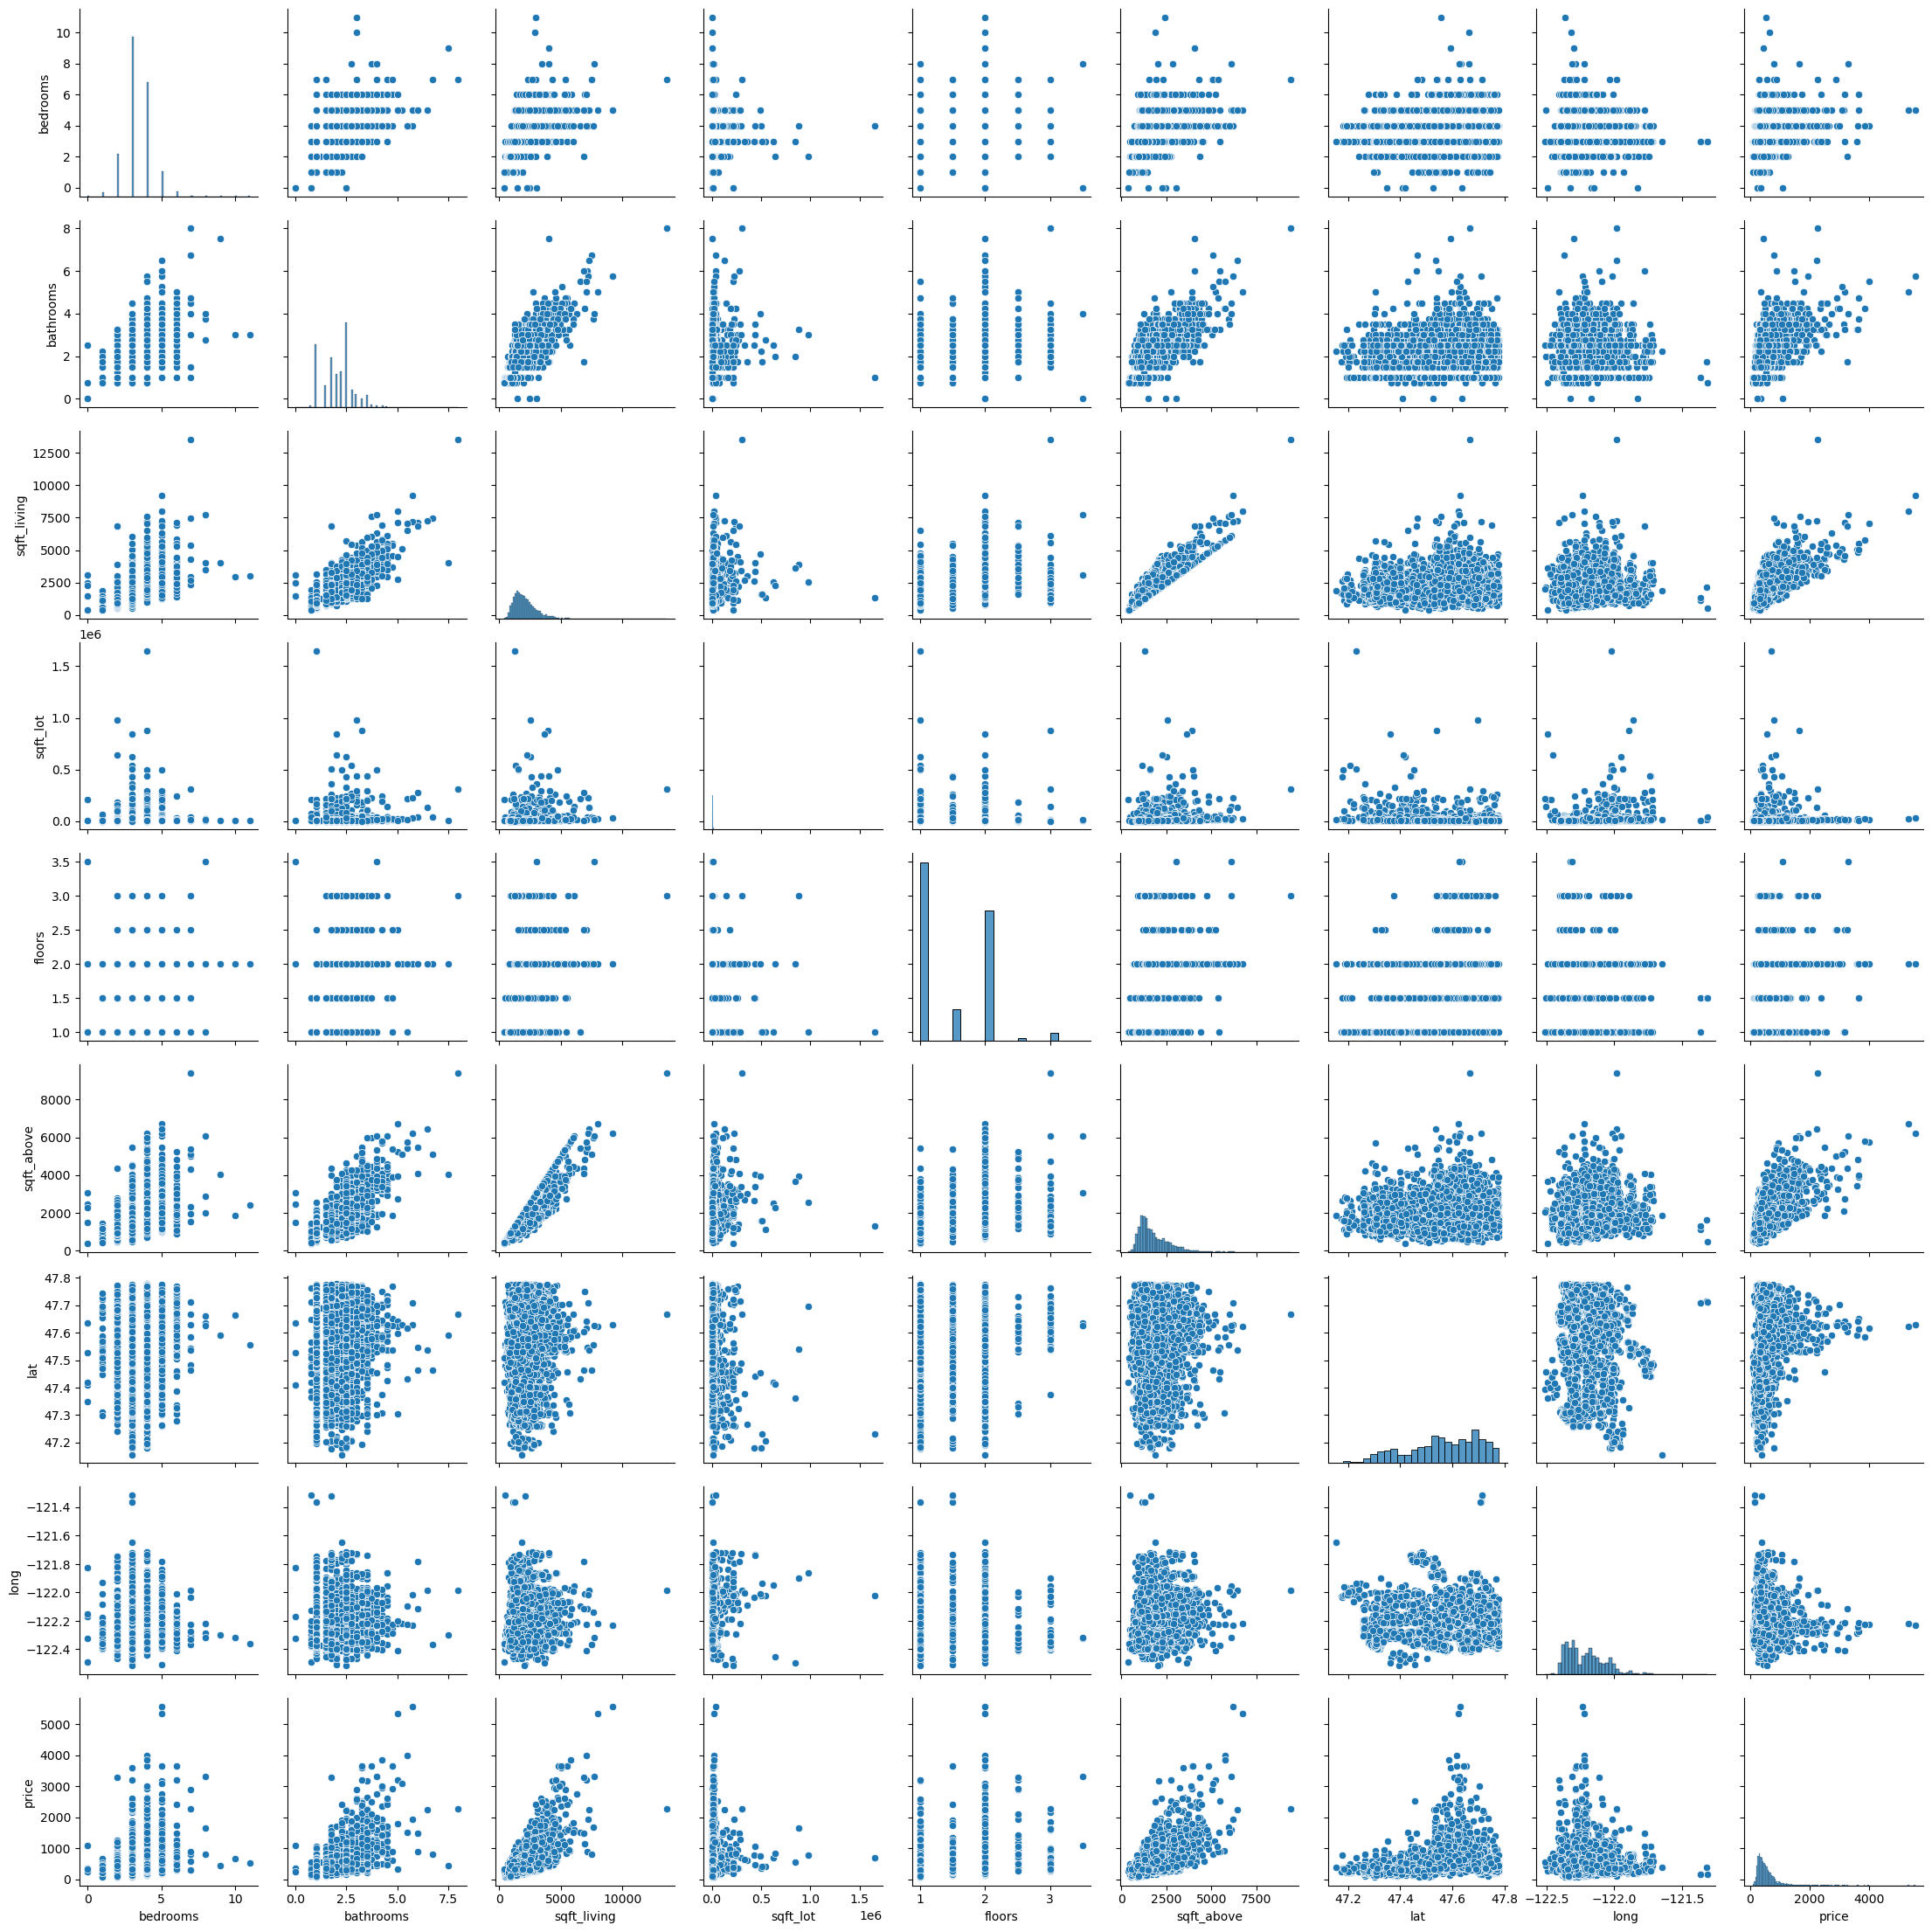

In [8]:
sns.pairplot(house_df);

* Correlation among the variables is useful to examine. 
* Correlation matrix below is closely related to as the Covariance matrix in our solution for the Regression coefficents. 
* In the case of centered and scaled data (after using `StandardScaler`) the Correlation Matrix and the Covariance Matrix are the same thing. 

<Axes: >

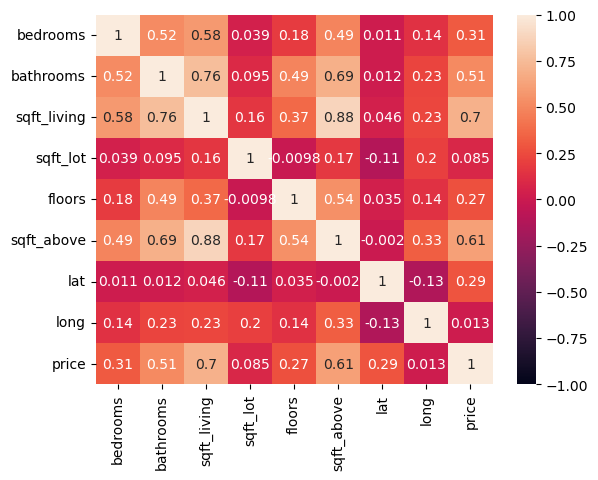

In [9]:
sns.heatmap(house_df.corr(), vmin=-1, vmax=1, annot=True)

### Train-Test Split

In [10]:
# first split the data into a train-test split and don't touch the test set yet
train_df, test_df = train_test_split(house_df, test_size=0.3, random_state=42)

### Standardization, aka center and scale

In [11]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
            'lat', 'long']

X_train = train_df[features]
y_train = np.log(np.array(train_df['price']).reshape(-1,1)) # to make sure its a column still.  

X_test = test_df[features]
y_test = np.log(np.array(test_df['price']).reshape(-1,1))

scaler = StandardScaler().fit(X_train)

# This converts our matrices into numpy matrices
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

# Making the numpy matrices pandas dataframes
X_train_df = pd.DataFrame(X_train_t, columns=features)
X_test_df = pd.DataFrame(X_test_t, columns=features)
# Have a quick look to make sure its all ok  
display(X_train_df.describe())
display(X_test_df.describe())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
count,2.800000e+03,2.800000e+03,2.800000e+03,2.800000e+03,2.800000e+03,2.800000e+03,2.800000e+03,2.800000e+03
mean,-2.467867e-16,-2.664535e-16,4.948423e-17,2.537653e-18,1.928616e-16,-3.552714e-17,-1.708602e-14,1.509561e-13
std,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00
min,-3.645194e+00,-2.695863e+00,-1.774726e+00,-3.248772e-01,-9.050140e-01,-1.631544e+00,-2.962352e+00,-2.147144e+00
25%,-4.101565e-01,-4.735929e-01,-7.214977e-01,-2.282902e-01,-9.050140e-01,-7.284219e-01,-6.573203e-01,-7.922026e-01
50%,-4.101565e-01,1.613413e-01,-1.896694e-01,-1.750433e-01,-9.050140e-01,-2.944540e-01,6.680507e-02,-1.040350e-01
75%,6.681892e-01,4.788084e-01,4.985790e-01,-1.062979e-01,9.888867e-01,5.500242e-01,8.660290e-01,6.055263e-01
max,8.216609e+00,6.828151e+00,7.391491e+00,2.074584e+01,3.829738e+00,5.769369e+00,1.580835e+00,6.367593e+00


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-0.003980,-0.027022,-0.052972,0.023665,-0.018037,-0.033567,-0.027250,-0.003538
std,0.982704,0.981375,0.994934,1.301759,1.014141,0.989349,1.053589,1.038758
min,-3.645194,-2.695863,-1.801839,-0.327625,-0.905014,-1.662039,-2.812520,-1.975993
25%,-0.410156,-0.473593,-0.724105,-0.227399,-0.905014,-0.728422,-0.780292,-0.849253
50%,-0.410156,0.161341,-0.231381,-0.175677,-0.905014,-0.323776,0.148664,-0.178913
75%,0.668189,0.478808,0.417762,-0.108069,0.988887,0.467922,0.849949,0.642966
max,4.981572,7.463085,11.917246,35.108445,3.829738,8.924433,1.564756,6.410380


In [12]:
# lets scale y as well, since this is a linear regression model 
scaler = StandardScaler().fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

### Fit the Linear Regression Model

In [13]:
lr = LinearRegression()
lr.fit(X_train_df,y_train)
r2_train = lr.score(X_train_df,y_train)
print('Training r^2',r2_train)
r2_test = lr.score(X_test_df,y_test)
print('Test r^2', r2_test)

Training r^2 0.674822072248991
Test r^2 0.6266803511856192


### Polynomial Regression 

* We briefly discussed in class the idea that polynomial regression is actually a linear regression model. 

* Consider the model polynomial Regression Model of Order 2

For a single predictor variable $x$, the quadratic (second-order polynomial) regression model is written as:

$$  y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \varepsilon_i, 
\quad i = 1, 2, \dots, n $$
where $\varepsilon_i$ are random errors with $\mathbb{E}[\varepsilon_i]=0$ and 
$\mathrm{Var}(\varepsilon_i)=\sigma^2$.

The equivalent Linear Regression form:

Define the predictor  matrix, parameter vector, and response vector as:

$$ X =
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix} 
\quad
 \beta =
\begin{bmatrix}
\beta_0 \\[4pt]
\beta_1 \\[4pt]
\beta_2
\end{bmatrix} 
\quad
 y =
\begin{bmatrix}
y_1 \\[4pt]
y_2 \\[4pt]
\vdots \\[4pt]
y_n
\end{bmatrix}. $$

Then the model can be expressed compactly as
$$
y = X\beta + \varepsilon
$$
which is linear in the parameters $\beta_0, \beta_1, \beta_2$. 

## Two-Degree Polynomial Model

In [14]:
def add_square_terms(df):
    df = df.copy()
    cols = df.columns.copy()
    for col in cols:
        df['{}^2'.format(col)] = df[col]**2
    return df

X_train_df_2 = add_square_terms(X_train)
X_test_df_2 = add_square_terms(X_test)
# Standardizing our added coefficients
cols = X_train_df_2.columns
scaler = StandardScaler().fit(X_train_df_2)
X_train_df_2 = pd.DataFrame(scaler.transform(X_train_df_2), columns=cols)
X_test_df_2 = pd.DataFrame(scaler.transform(X_test_df_2), columns=cols)
print(X_train_df.shape, X_train_df_2.shape)

# Also check using the describe() function that the mean and standard deviations are the way we want them
X_train_df_2.head()

(2800, 8) (2800, 16)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,bedrooms^2,bathrooms^2,sqft_living^2,sqft_lot^2,floors^2,sqft_above^2,lat^2,long^2
0,-0.410156,-0.473593,-1.107334,-0.171308,-0.905014,-0.880897,-1.901106,-1.105979,-0.462763,-0.524879,-0.749038,-0.076723,-0.835145,-0.669504,-1.898568,1.106692
1,0.668189,0.478808,0.133599,-0.236866,0.988887,0.514838,-1.974194,-0.371458,0.522801,0.285500,-0.063405,-0.077980,0.877555,0.244369,-1.971296,0.371159
2,0.668189,0.161341,0.456867,-0.125242,-0.905014,-0.282725,1.526019,-0.321539,0.522801,-0.016406,0.196639,-0.075477,-0.835145,-0.358795,1.528915,0.321194
3,1.746535,1.431210,1.885504,-0.155896,0.988887,2.485287,-0.135285,2.331294,1.789955,1.381895,1.748933,-0.076340,0.877555,2.660013,-0.136785,-2.329982
4,-0.410156,-0.156126,-0.356518,-0.301264,2.882787,-0.036419,0.358063,-0.713759,-0.462763,-0.286532,-0.393464,-0.078624,3.732055,-0.195563,0.357039,0.713855


In [15]:
lr2 = LinearRegression()
lr2.fit(X_train_df_2,y_train)
r2_train_2 = lr2.score(X_train_df_2,y_train)
r2_test_2 = lr2.score(X_test_df_2,y_test)
print(r2_train_2)
print(r2_test_2)


0.7168557567596345
0.667638115950054


## N-Degree Polynomial Model

In [16]:
# generalizing our function from above
def add_higher_order_polynomial_terms(df, N=7):
    df = df.copy()
    cols = df.columns.copy()
    for col in cols:
        for i in range(2, N+1):
            df['{}^{}'.format(col, i)] = df[col]**i
    return df

N = 3
X_train_df_N = add_higher_order_polynomial_terms(X_train,N)
X_test_df_N = add_higher_order_polynomial_terms(X_test,N)

# Standardizing our added coefficients
cols = X_train_df_N.columns
scaler = StandardScaler().fit(X_train_df_N)
X_train_df_N = pd.DataFrame(scaler.transform(X_train_df_N), columns=cols)
X_test_df_N = pd.DataFrame(scaler.transform(X_test_df_N), columns=cols)

print(X_train_df.shape, X_train_df_N.shape)

# Also check using the describe() function that the mean and standard deviations are the way we want them
X_train_df_N.head()

(2800, 8) (2800, 24)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,bedrooms^2,bedrooms^3,...,sqft_lot^2,sqft_lot^3,floors^2,floors^3,sqft_above^2,sqft_above^3,lat^2,lat^3,long^2,long^3
0,-0.410156,-0.473593,-1.107334,-0.171308,-0.905014,-0.880897,-1.901106,-1.105979,-0.462763,-0.409579,...,-0.076723,-0.049599,-0.835145,-0.730133,-0.669504,-0.461087,-1.898568,-1.896029,1.106692,-1.107404
1,0.668189,0.478808,0.133599,-0.236866,0.988887,0.514838,-1.974194,-0.371458,0.522801,0.316319,...,-0.077980,-0.049614,0.877555,0.708733,0.244369,0.028315,-1.971296,-1.968398,0.371159,-0.370860
2,0.668189,0.161341,0.456867,-0.125242,-0.905014,-0.282725,1.526019,-0.321539,0.522801,0.316319,...,-0.075477,-0.049579,-0.835145,-0.730133,-0.358795,-0.332992,1.528915,1.531813,0.321194,-0.320849
3,1.746535,1.431210,1.885504,-0.155896,0.988887,2.485287,-0.135285,2.331294,1.789955,1.513070,...,-0.076340,-0.049594,0.877555,0.708733,2.660013,2.406777,-0.136785,-0.138285,-2.329982,2.328667
4,-0.410156,-0.156126,-0.356518,-0.301264,2.882787,-0.036419,0.358063,-0.713759,-0.462763,-0.409579,...,-0.078624,-0.049618,3.732055,4.614226,-0.195563,-0.248099,0.357039,0.356012,0.713855,-0.713950


In [17]:
lrN = LinearRegression()
lrN.fit(X_train_df_N,y_train)
r2_train = lrN.score(X_train_df_N,y_train)
print(r2_train)
r2_test = lrN.score(X_test_df_N,y_test)
print(r2_test)

0.7885703670005678
0.7425479955190174


In [18]:
train_score = list()
test_score = list()
train_score.append(r2_train)  # This is the value for the linear model n = 1 
test_score.append(r2_test) # this is the value for the linear model n = 1
for n in range(2,10):
    N = n
    X_train_df_N = add_higher_order_polynomial_terms(X_train,N)
    X_test_df_N = add_higher_order_polynomial_terms(X_test,N)

# Standardizing our added coefficients
    cols = X_train_df_N.columns
    scaler = StandardScaler().fit(X_train_df_N)
    X_train_df_N = pd.DataFrame(scaler.transform(X_train_df_N), columns=cols)
    X_test_df_N = pd.DataFrame(scaler.transform(X_test_df_N), columns=cols)
    lrN = LinearRegression()
    lrN.fit(X_train_df_N,y_train)
    r2_train_N = lrN.score(X_train_df_N,y_train)
    train_score.append(r2_train_N)
    r2_test_N = lrN.score(X_test_df_N,y_test)
    test_score.append(r2_test_N)

Text(0, 0.5, '$r^2$')

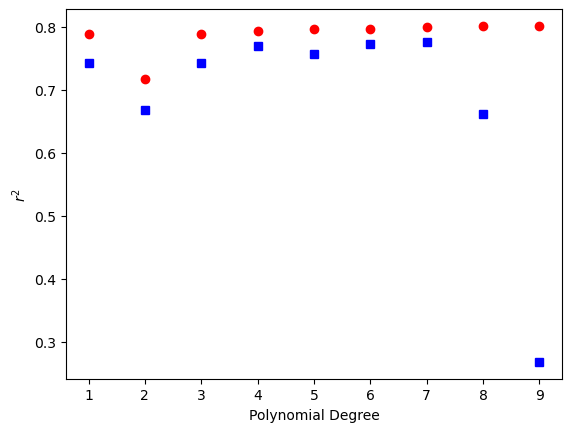

In [19]:
plt.plot(range(1,10),train_score,'ro',label = 'train')
plt.plot(range(1,10),test_score,'bs',label = 'val')
plt.xlabel('Polynomial Degree')
plt.ylabel('$r^2$')


In [20]:
print(train_score)
print(test_score)

[0.7885703670005678, 0.7168557567596345, 0.7885703670005678, 0.7934007203355076, 0.7960911494188013, 0.7969322447393195, 0.8001228821703421, 0.8007077808417424, 0.801212075337592]
[0.7425479955190174, 0.667638115950054, 0.7425479955190174, 0.7696216194631, 0.7563677510867808, 0.7717878979658837, 0.7749800913069604, 0.6613724081422738, 0.2676136678145886]


###  A big difference between training and validation R^2 scores is usually a sign that we are **overfitting**.

<p align="center">
  <img src="bias_variance.png" alt="alt text" width="70%">
</p>


### Regularization: Overview
    
* The idea of regularization revolves around modifying the loss function L
* In Linear Regression, the Loss function is the MSE
* In Logistic Regression, the Loss function is the negative log-Likelihood. 
* The idea of the regularization is adding a 2nd term to the loss function that penalizes properties of the model parameters $\theta$ . 

    $$ L_{reg}(\theta) = L(\theta) + R(\theta) $$
    
* In our Bias/Variance graph, we are intentionally adding Bias to the model, in the expectation that we can reduce variance by doing so. 
* We will consider two forms of R which penalize the magnitude of $\theta$ in different ways. 
    * The L1-norm (absolute value) penalty is a LASSO penalty. 
    * The L2-norm (squared absolute value) penalty is a Ridge penalty. 
* Akaike Information Criterion (AIC) was similar in spirit in penalizing more complicated models.  

### Ridge Regularization

* Imposes L2-norm penalty as 
    $$ \boldsymbol{\hat{\beta_R}} = argmin_{\boldsymbol{\beta}} (\Vert \boldsymbol{Y} - \boldsymbol{X}\boldsymbol{\beta} \Vert ^2 + \lambda \Vert \boldsymbol{\beta} \Vert ^2)$$
    
* In practice, the ridge estimator shrinks the coefficients with the amount of regularization dependent on $\lambda$ 
    
* If we evaluate all the $\beta_k$ derivatives and set it equal to zero, we obtain the solution 
    $$ \boldsymbol{\hat{\beta_{R}}} = (\boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I})^{-1} \boldsymbol{X}^T \boldsymbol{Y} $$
* Recall, the Ordinary Least Squares (OLS) 
    $$ \hat{\boldsymbol{\beta}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{Y} $$

* In a univariate case, with standardized $\boldsymbol{X}$, 
  $$\boldsymbol{X}^T\boldsymbol{X} = 1$$
  $$\boldsymbol{\hat{\beta}_{R}} = \frac{\boldsymbol{\hat{\beta}}}{1+\lambda}$$
* Ridge regression shrinks the OLS predictors.



<p align="center">
  <img src="Ridge_pretty.png" alt="alt text" width="70%">
</p>


###  Least Absolute Shrinkage and Selection Operator (LASSO}

* Idea: L1 (absolute value) penalization on the coefficients.
$$ \boldsymbol{\hat{\beta_L}} = argmin_{\boldsymbol{\beta}} (\Vert \boldsymbol{Y} - \boldsymbol{X}\boldsymbol{\beta} \Vert ^2 + \lambda \Vert \boldsymbol{\beta} \Vert) $$

* The key point is to penalize the absolute value of the coefficients instead of the sum squared. 
* No closed form solution because L1 norm not have a derivative at zero 

<p align="center">
  <img src="absolutevalue.png" alt="alt text" width="70%">
</p>


<p align="center">
  <img src="Lasso_pretty.png" alt="alt text" width="70%">
</p>


### Differences between Ridge and Lasso Regularization

* Ridge imposes an absolute-value squared penalty (L2-norm) 
* LASSO imposes an absolute-value penalry (L1-norm)
* Since Lasso regularization will produce zero estimates for a number of model parameters 
    - we say that Lasso solutions are **sparse** 
    - LASSO is a method for variable selection.
* In Ridge Regression, the penalty term is proportional to the L2-norm of the coefficients
    - Ridge regression will produce smooth models incorporating all the predictive variable. 
* For Linear Regression Ridge produces an exact (closed-form) solution! 
    * Lasso Regression does not and must be solved numerically.
    * Lasso can take a long time if you have a lot of variables.   
* For Logistic Regression both have to be solved numerically. 



### Parameters verus Hyperparameters 

* In our regression models (Linear or Logistic) $\beta_k$ are the parameters of the model that we are trying to fit. 
* To use regularization, we introduce a **hyperparameter** $\lambda$ which controls the relative importance of our two loss functions. 
* An annoying thing is that `sklearn` coded $\lambda$ as $\alpha$
* We are going to have to learn how to choose $\lambda$


One solution to the problems raised by using a single validation set is to evaluate each model on multiple validation sets and average the validation performance. This is the essence of cross-validation!

<img src="cross_val.png" width="700">


### The problem of correlation among predictors 

Referred in the jargony world of statistics as **colinearity** or **multicolinearity** 

This makes regression models fail to produce stable responses. 

Regularization will mitigate this problem. 

* Simulation of a bivariate regression model.  

In [21]:
b_true = np.array([3,7]).reshape((-1,1))
N=100
sigma = 5
X = np.random.normal(scale = 5, size = (N,2))
eps = np.random.normal(scale=sigma, size = (N,1))
y = X@b_true + eps
print(np.corrcoef(np.transpose(X)))

[[1.         0.08851136]
 [0.08851136 1.        ]]


In [22]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)

[[2.72702187 7.04632634]]


In [23]:
b_true = np.array([3,7]).reshape((2,1))
# Generate random data with high colinearity between predictors
x1 = np.random.normal(scale = 5, size=(N,1))
x2 = x1 + np.random.normal(scale=0.2, size=(N,1))
X_colin = np.column_stack((x1,x2))
eps = np.random.normal(scale=sigma, size = (N,1))
y_colin = X_colin@b_true+eps
print(np.corrcoef(np.transpose(X_colin)))


[[1.        0.9993055]
 [0.9993055 1.       ]]


In [24]:
lr = LinearRegression()
lr.fit(X_colin,y_colin)
print(lr.coef_)

[[2.07795983 8.13807468]]


Lets return to our polynomial model, with n chosen so it predicts new data poorly, indicating it has overfit the data. 

In [29]:
# generalizing our function from above
def add_higher_order_polynomial_terms(df, N=7):
    df = df.copy()
    cols = df.columns.copy()
    for col in cols:
        for i in range(2, N+1):
            df['{}^{}'.format(col, i)] = df[col]**i
    return df

N = 9
X_train_df_N = add_higher_order_polynomial_terms(X_train,N)
X_test_df_N = add_higher_order_polynomial_terms(X_test,N)

# Standardizing our added coefficients
cols = X_train_df_N.columns
scaler = StandardScaler().fit(X_train_df_N)
X_train_df_N = pd.DataFrame(scaler.transform(X_train_df_N), columns=cols)
X_test_df_N = pd.DataFrame(scaler.transform(X_test_df_N), columns=cols)

print(X_train_df.shape, X_train_df_N.shape)

# Also check using the describe() function that the mean and standard deviations are the way we want them


(2800, 8) (2800, 72)


We will label the usual linear regression solution as the OLS (ordinary least-squares) solution 

In [30]:
lrN = LinearRegression()
lrN.fit(X_train_df_N,y_train)
r2_train_OLS = lrN.score(X_train_df_N,y_train)
print(r2_train_OLS)
r2_test_OLS = lrN.score(X_test_df_N,y_test)
print(r2_test_OLS)

0.801212075337592
0.2676136678145886


### Ridge (L2-norm) Regularization

OLS model:  train 0.801212075337592 test 0.2676136678145886
Ridge model:  train 0.6858594005706381 test 0.6120909085951529


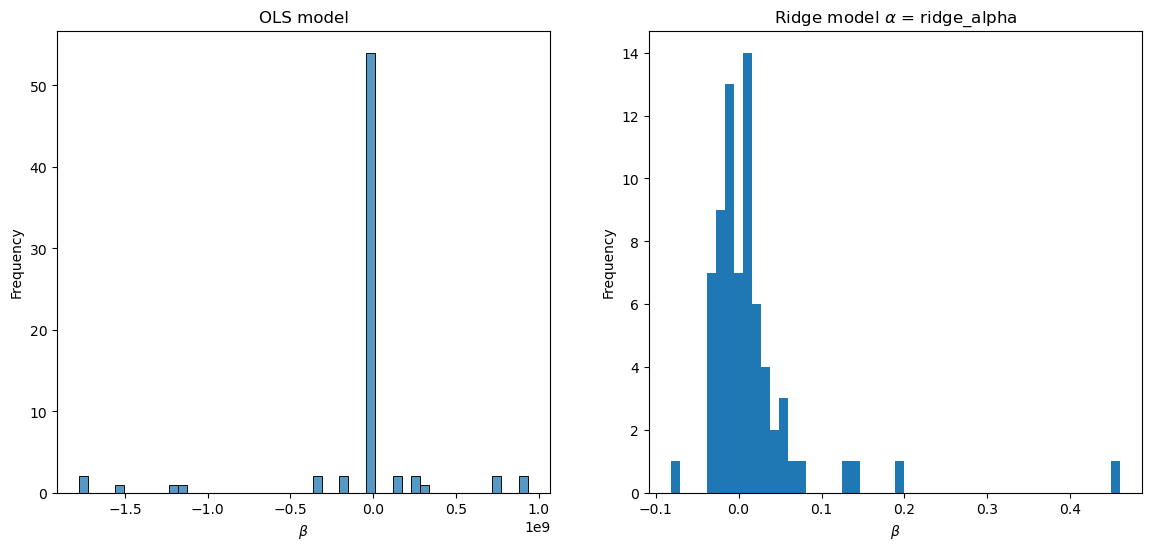

In [91]:
from sklearn.linear_model import Ridge

# some values you can try out: 0.01, 0.1, 0.5, 1, 5, 10, 20, 40, 100, 200, 500, 1000, 10000
ridge_alpha = 100
ridge_model = Ridge(alpha=ridge_alpha).fit(X_train_df_N, y_train)
r2_train_Ridge = ridge_model.score(X_train_df_N,y_train)
r2_test_Ridge = ridge_model.score(X_test_df_N,y_test)

print('OLS model: ', 'train' , r2_train_OLS, 'test', r2_test_OLS)
print('Ridge model: ', 'train', r2_train_Ridge, 'test', r2_test_Ridge)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(lrN.coef_.flatten(), bins=50)
plt.title('OLS model')
plt.xlabel(r'$\beta$')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(ridge_model.coef_.flatten(), bins=50)
plt.title('Ridge model ' + r'$\alpha$' + ' = ridge_alpha')
plt.xlabel(r'$\beta$')
plt.ylabel('Frequency');

Lasso (L-1 norm) Regularization

OLS model:  train 0.801212075337592 test 0.2676136678145886
Ridge model:  train 0.6858594005706381 test 0.6120909085951529
Lasso model:  train 0.6852175875796698 test 0.6494064892140994


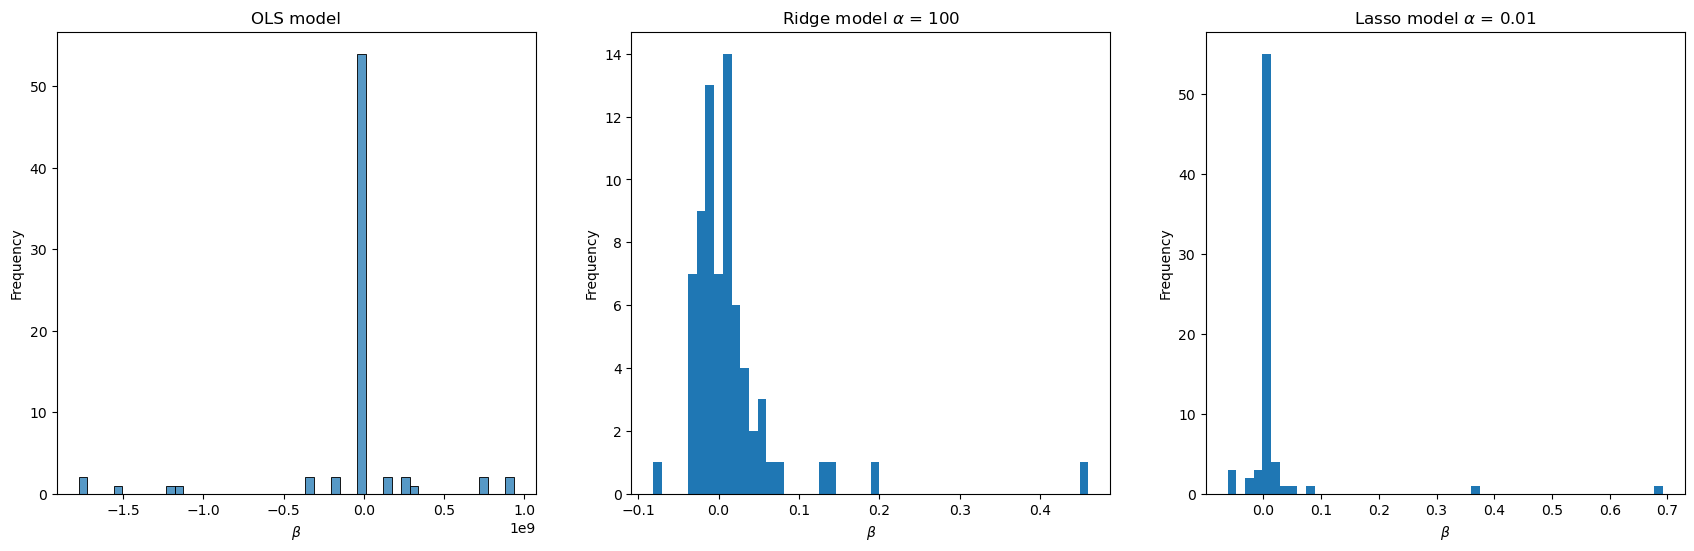

In [92]:
from sklearn.linear_model import Lasso

# some values you can try out: 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20
lasso_alpha = 0.01
lasso_model = Lasso(alpha=lasso_alpha, max_iter = 10000).fit(X_train_df_N, y_train)
r2_train_Lasso = lasso_model.score(X_train_df_N,y_train)
r2_test_Lasso = lasso_model.score(X_test_df_N,y_test)

print('OLS model: ', 'train' , r2_train_OLS, 'test', r2_test_OLS)
print('Ridge model: ', 'train', r2_train_Ridge, 'test', r2_test_Ridge)
print('Lasso model: ', 'train', r2_train_Lasso, 'test', r2_test_Lasso)

plt.figure(figsize=(21,6))
plt.subplot(1,3,1)
sns.histplot(lrN.coef_.flatten(), bins=50)
plt.title('OLS model')
plt.xlabel(r'$\beta$')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
plt.hist(ridge_model.coef_.flatten(), bins=50)
plt.title('Ridge model ' + r'$\alpha$' + ' = ' + str(ridge_alpha))
plt.xlabel(r'$\beta$')
plt.ylabel('Frequency');
plt.subplot(1,3,3)
plt.hist(lasso_model.coef_.flatten(), bins=50)
plt.title('Lasso model ' + r'$\alpha$' + ' = ' + str(lasso_alpha))
plt.xlabel(r'$\beta$')
plt.ylabel('Frequency');

In [100]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

alphas = (0.001, 0.01, 0.1,1,10,100,1000)


# Let us do k-fold cross validation 
k = 5
fitted_ridge = RidgeCV(alphas = alphas, cv = k).fit(X_train_df_N, y_train)
fitted_lasso = LassoCV(alphas = alphas, max_iter = 100000, cv = k).fit(X_train_df_N, y_train)


ridge_a = fitted_ridge.alpha_
r2_train_Ridge = fitted_ridge.score(X_train_df_N,y_train)
r2_test_Ridge = fitted_ridge.score(X_test_df_N,y_test)

print('Ridge model: ', 'train', r2_train_Ridge, 'test', r2_test_Ridge)
print('Ridge model: ', r'$alpha$', ' = ' , str(ridge_a))

lasso_a = fitted_lasso.alpha_
r2_train_Lasso = fitted_lasso.score(X_train_df_N,y_train)
r2_test_Lasso = fitted_lasso.score(X_test_df_N,y_test)

print('Lasso model: ', 'train', r2_train_Lasso, 'test', r2_test_Lasso)
print('Lasso model: ', r'$alpha$', ' = ' , str(lasso_a))


Ridge model:  train 0.7230523955835331 test 0.5234966983310221
Ridge model:  $alpha$  =  0.1
Lasso model:  train 0.6852175875796698 test 0.6494064892140994
Lasso model:  $alpha$  =  0.01


/home/ramesh/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Hmm, that seems worse for the Ridge model.  Lets discuss this. 

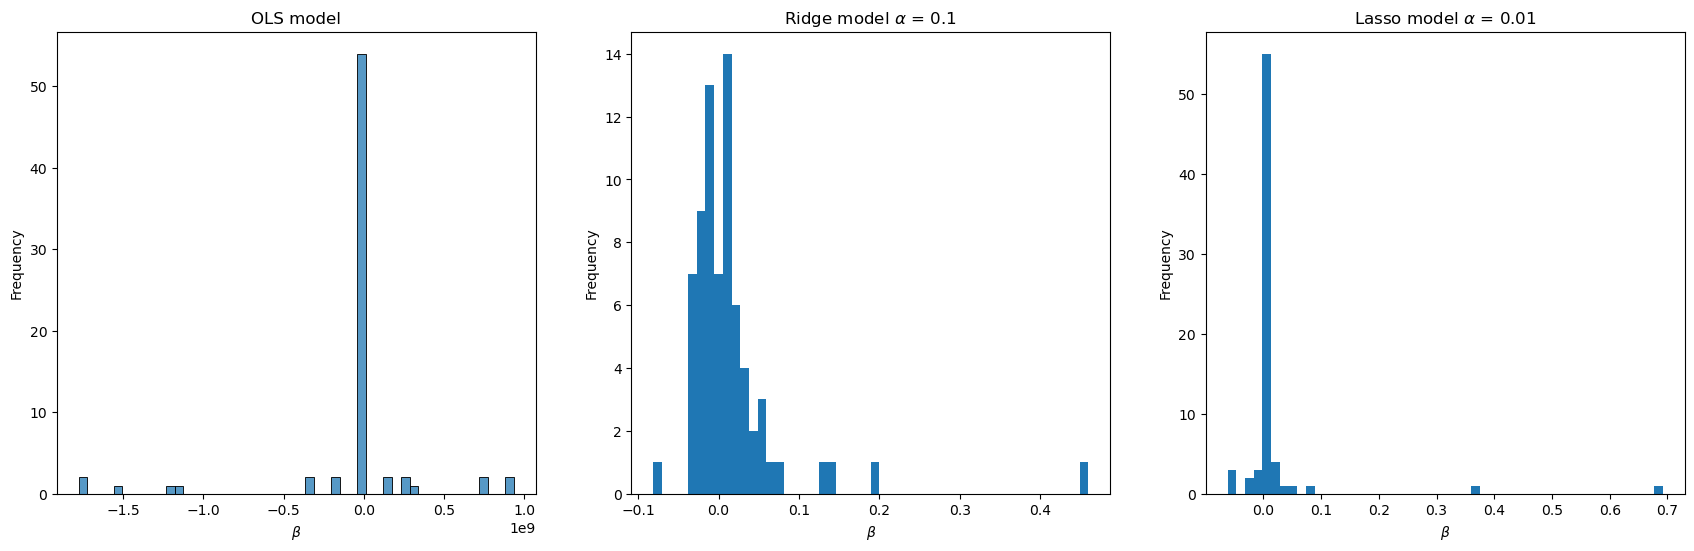

In [102]:
plt.figure(figsize=(21,6))
plt.subplot(1,3,1)
sns.histplot(lrN.coef_.flatten(), bins=50)
plt.title('OLS model')
plt.xlabel(r'$\beta$')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
plt.hist(ridge_model.coef_.flatten(), bins=50)
plt.title('Ridge model ' + r'$\alpha$' + ' = ' + str(ridge_a))
plt.xlabel(r'$\beta$')
plt.ylabel('Frequency');
plt.subplot(1,3,3)
plt.hist(lasso_model.coef_.flatten(), bins=50)
plt.title('Lasso model ' + r'$\alpha$' + ' = ' + str(lasso_a))
plt.xlabel(r'$\beta$')
plt.ylabel('Frequency');